In [ ]:
# Data Import and Cleaning
import numpy as np
import pandas as pd


In [ ]:

data = pd.read_csv("/content/drive/MyDrive/ACME Python Task Data/marketing_data.csv")

In [ ]:
data.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0   6/16/2014        0       189  ...                  6   
1         0   6/15/2014        0       464  ...                  7   
2         1   5/13/2014        0       134  ...                  5   
3         1   5/11/2014        0        10  ...                  2   
4         0    4/8/2014        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

In [ ]:
#checking for missing values
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [ ]:
#checking for columns
data.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
#stripping white spaces in my column names
data.columns = data.columns.str.strip()

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

In [ ]:
#correcting data types
data['Income_numeric'] = pd.to_numeric(data['Income'].replace('[\$,]', '', regex=True))
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce')

In [ ]:
#data.info()

In [ ]:
#checking for outlier
import matplotlib.pyplot as plt

# Create boxplots for numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    plt.boxplot(data[column].dropna(), vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()


<ipython-input-11-13792e35e2a7>:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


In [ ]:
#creating new column such as age calculated from year birth
from datetime import datetime

current_year = datetime.now().year

data["Age"] = current_year - data['Year_Birth']

data.head()


ID  Year_Birth   Education Marital_Status       Income  Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0         0  2014-06-16        0       189  ...             0             0   
1         0  2014-06-15        0       464  ...             0             0   
2         1  2014-05-13        0       134  ...             0             0   
3         1  2014-05-11        0        10  ...             0             0   
4         0  2014-04-08        0         6  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  \
0             0             0             0         1         0       SP   
1             0             0             1         1         0       CA   
2             0             0             0         0         0       US   
3             0             0             0         0         0      AUS   
4             0             0             0         1         0       SP   

   Income_numeric  Age  
0         84835.0   54  
1         57091.0   63  
2         67267.0   66  
3         32474.0   57  
4         21474.0   35  

[5 rows x 30 columns]

In [ ]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Generate descriptive statistics to understand the distribution of the data.
data.describe()

ID   Year_Birth      Kidhome     Teenhome  \
count   2216.000000  2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397     0.441787     0.505415   
min        0.000000  1893.000000     0.000000     0.000000   
25%     2814.750000  1959.000000     0.000000     0.000000   
50%     5458.500000  1970.000000     0.000000     0.000000   
75%     8421.750000  1977.000000     1.000000     1.000000   
max    11191.000000  1996.000000     2.000000     2.000000   
std     3249.376275    11.985554     0.536896     0.544181   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2216  2216.000000  2216.000000  2216.000000   
mean   2013-07-10 11:29:27.509025280    49.012635   305.091606    26.356047   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    24.000000     2.000000   
50%              2013-07-08 12:00:00    49.000000   174.500000     8.000000   
75%              2013-12-31 00:00:00    74.000000   505.000000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.948352   337.327920    39.793917   

       MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
count      2216.000000      2216.000000  ...        2216.000000   2216.000000   
mean        166.995939        37.637635  ...           5.319043      0.073556   
min           0.000000         0.000000  ...           0.000000      0.000000   
25%          16.000000         3.000000  ...           3.000000      0.000000   
50%          68.000000        12.000000  ...           6.000000      0.000000   
75%         232.250000        50.000000  ...           7.000000      0.000000   
max        1725.000000       259.000000  ...          20.000000      1.000000   
std         224.283273        54.752082  ...           2.425359      0.261106   

       AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Response  \
count   2216.000000   2216.000000   2216.000000   2216.000000  2216.000000   
mean       0.074007      0.073105      0.064079      0.013538     0.150271   
min        0.000000      0.000000      0.000000      0.000000     0.000000   
25%        0.000000      0.000000      0.000000      0.000000     0.000000   
50%        0.000000      0.000000      0.000000      0.000000     0.000000   
75%        0.000000      0.000000      0.000000      0.000000     0.000000   
max        1.000000      1.000000      1.000000      1.000000     1.000000   
std        0.261842      0.260367      0.244950      0.115588     0.357417   

          Complain  Income_numeric          Age  
count  2216.000000     2216.000000  2216.000000  
mean      0.009477    52247.251354    55.179603  
min       0.000000     1730.000000    28.000000  
25%       0.000000    35303.000000    47.000000  
50%       0.000000    51381.500000    54.000000  
75%       0.000000    68522.000000    65.000000  
max       1.000000   666666.000000   131.000000  
std       0.096907    25173.076661    11.985554  

[8 rows x 26 columns]

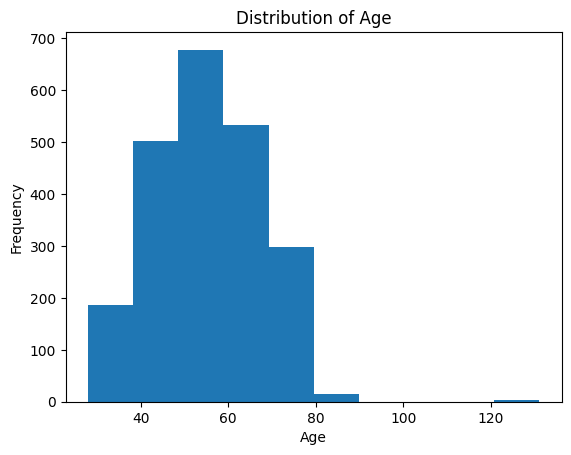

In [ ]:
#Visualization
plt.hist(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#changing education to a categorical value
data['education_numeric'], unique_levels = pd.factorize(data['Education'])
#print(data)
print('Unique Education Levels:', unique_levels)
data.head()

Unique Education Levels: Index(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype='object')


ID  Year_Birth   Education Marital_Status       Income  Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0         0  2014-06-16        0       189  ...             0             0   
1         0  2014-06-15        0       464  ...             0             0   
2         1  2014-05-13        0       134  ...             0             0   
3         1  2014-05-11        0        10  ...             0             0   
4         0  2014-04-08        0         6  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Income_numeric  \
0             0             0         1         0       SP         84835.0   
1             0             1         1         0       CA         57091.0   
2             0             0         0         0       US         67267.0   
3             0             0         0         0      AUS         32474.0   
4             0             0         1         0       SP         21474.0   

   Age  education_numeric  
0   54                  0  
1   63                  0  
2   66                  0  
3   57                  0  
4   35                  0  

[5 rows x 31 columns]

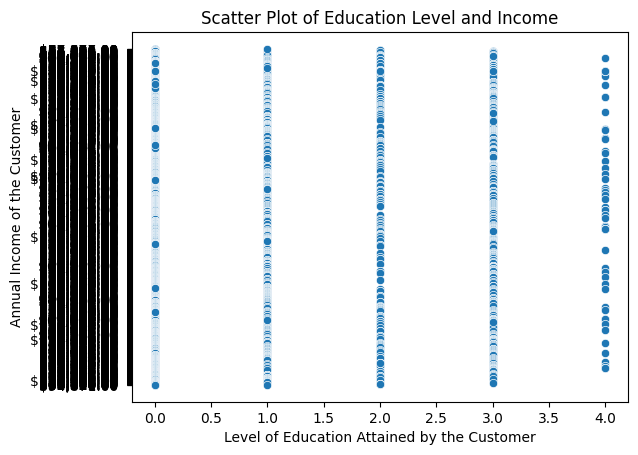

In [ ]:
#Create visualizations using Matplotlib and Seaborn to explore relationships between variables
sns.scatterplot(data = data, x = "education_numeric", y = "Income")
plt.xlabel("Level of Education Attained by the Customer")
plt.ylabel("Annual Income of the Customer")
plt.title("Scatter Plot of Education Level and Income")
plt.show()

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income_numeric',
       'Age', 'education_numeric'],
      dtype='object')

In [ ]:
#Customer Segmentation
from sklearn.cluster import KMeans
features = data[['Income_numeric', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(features)
data['Cluster'] = clusters




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


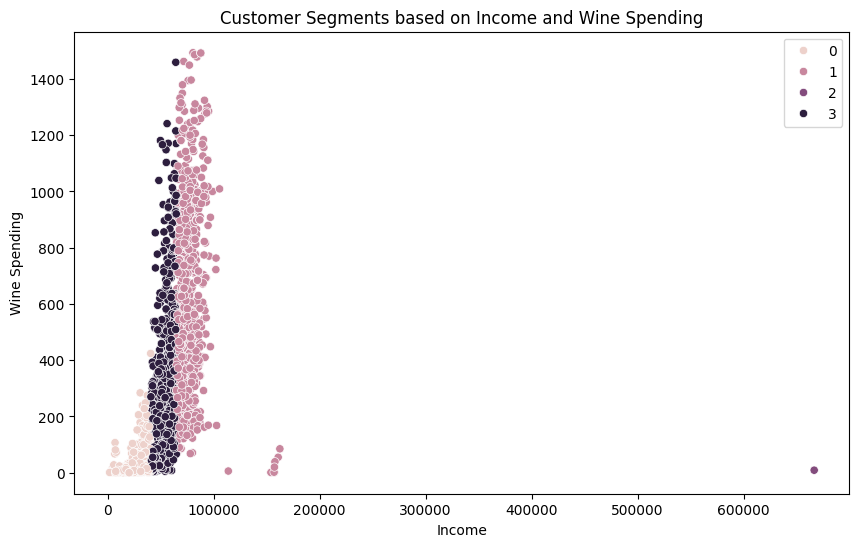

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income_numeric', y='MntWines', hue='Cluster', data=data)
plt.title('Customer Segments based on Income and Wine Spending')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.legend()
plt.show()


In [ ]:
#Purchasing Behavior Analysis
# Group data by clusters and calculate mean spending in each category
cluster_analysis = data.groupby('Cluster')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

print(cluster_analysis)


           MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                            
0         31.121821   5.991968        25.665328         9.057564   
1        617.056934  56.929927       398.058394        83.005839   
2          9.000000  14.000000        18.000000         8.000000   
3        293.923372  19.052363        99.876117        25.251596   

         MntSweetProducts  MntGoldProds  
Cluster                                  
0                6.068273     17.730924  
1               60.083212     70.278832  
2                1.000000     12.000000  
3               18.141762     46.014049  


AcceptedCmp1    6.407942
AcceptedCmp2    1.353791
AcceptedCmp3    7.355596
AcceptedCmp4    7.400722
AcceptedCmp5    7.310469
dtype: float64


<ipython-input-22-03eb334ee23c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaigns, y=campaign_effectiveness, palette='viridis')


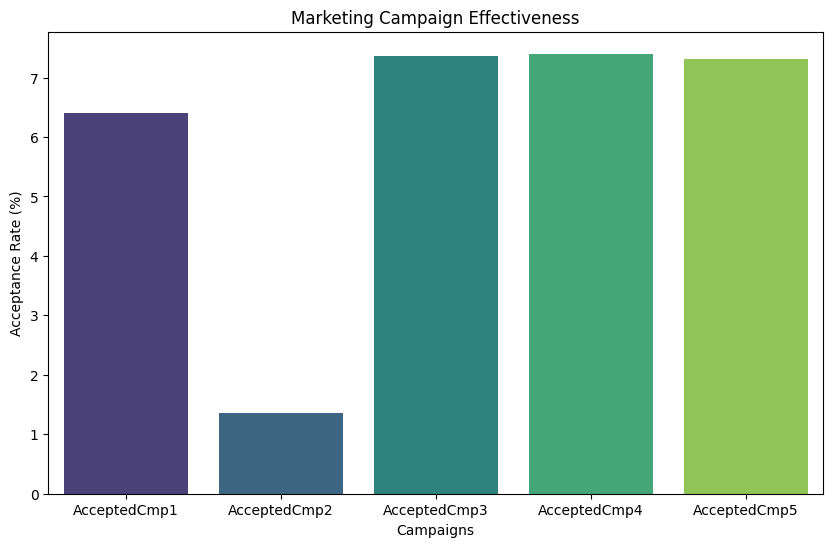

In [ ]:
#Marketing Campaign Effectiveness
# Calculate the acceptance rate for each campaign
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_effectiveness = data[campaigns].mean() * 100

print(campaign_effectiveness)

# Visualize the campaign effectiveness
plt.figure(figsize=(10, 6))
sns.barplot(x=campaigns, y=campaign_effectiveness, palette='viridis')
plt.title('Marketing Campaign Effectiveness')
plt.xlabel('Campaigns')
plt.ylabel('Acceptance Rate (%)')
plt.show()


In [ ]:
#Predictive Analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
X = data[['Income_numeric', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.84
Precision: 0.63
Recall: 0.25


<Figure size 1200x800 with 0 Axes>

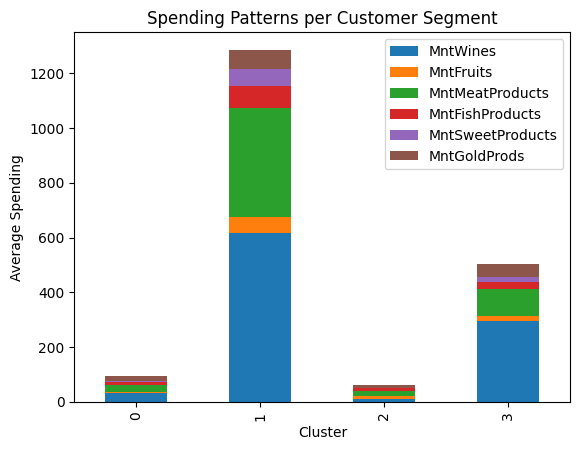

In [ ]:
#Visualization and Reporting
plt.figure(figsize=(12, 8))
cluster_analysis.plot(kind='bar', stacked=True)
plt.title('Spending Patterns per Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.legend(loc='upper right')
plt.show()
